Linear regression - data preprocessing
- Uni-variant analysis
- EDA
- Identify and handle outliers
- imputing missing values
- seasonality 
- Bi-variant analysis
- variable transformation
- effective data handling
- dummy variables
- correlation and signifiance
- corelation analysis 

Prediction is estimating outcome for the unseen data, but forecasting is a subdiscipline of prediction, which we are making predictions on the future using time series. If you add the time dimension also and then try to predict the future values, then basically your prediction problem becomes a forecasting problem.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
hp = pd.read_csv('house price.csv', header  = 0, index_col=0)

In [6]:
hp

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Uni-variant analysis and EDA
- Univariate analysis involves examining and summarizing one variable at a time to understand its distribution, statistics, and patterns.

In [8]:
hp.shape

(1460, 80)

In [10]:
#Identify missing values, everything else is 1460 rows while MasVnrArea has 8 Missing values


hp.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


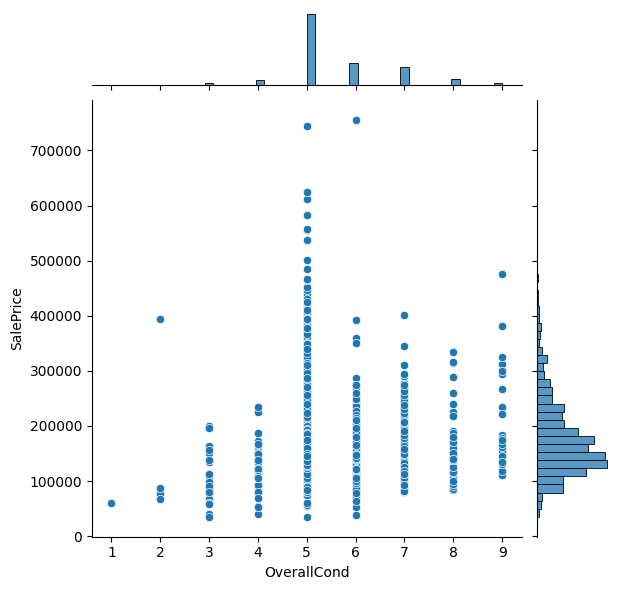

In [11]:
#combine of scatter plot n histogram
sns.jointplot(x='OverallCond', y='SalePrice', data=hp)

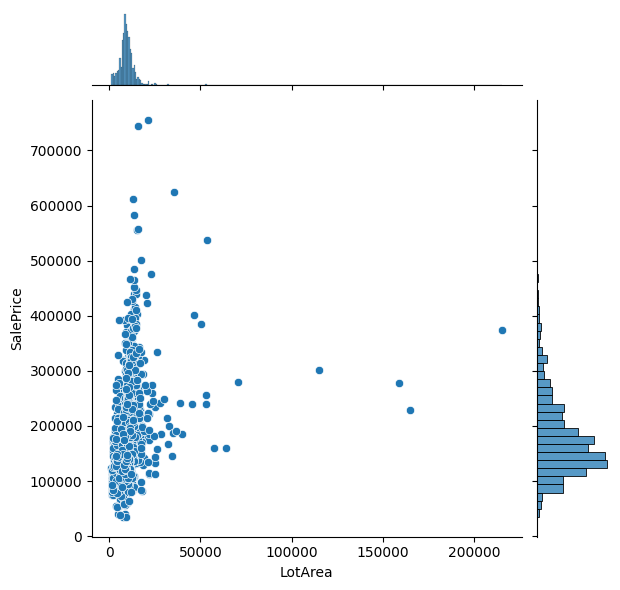

In [12]:
sns.jointplot(x='LotArea', y='SalePrice', data=hp)

In [13]:
#view data
hp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: xlabel='LotShape', ylabel='count'>

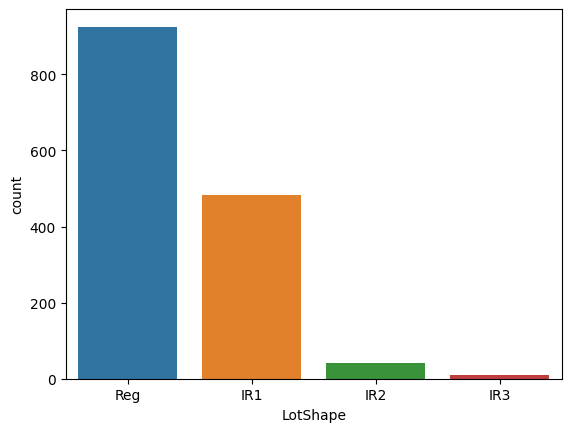

In [17]:
sns.countplot(x='LotShape', data=hp)

Outlier treatment
- This is a common approach for outlier treatment. It involves identifying outliers based on the IQR and then removing or handling them appropriately.

In [18]:
#identify missing value, data type
hp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [24]:
np.percentile(hp.LotArea,[99])

array([37567.64])

In [25]:
var1= np.percentile(hp.LotArea,[99])[0]

In [27]:
hp[(hp.LotArea > var1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
272,20,RL,73.0,39104,Pave,NaN,IR1,Low,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,241500
314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
385,60,RL,NaN,53107,Pave,NaN,IR2,Low,AllPub,Corner,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,240000
452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [28]:
hp.LotArea[(hp.LotArea > 3 *var1)] = 3*var1

C:\Users\1610tx\AppData\Local\Temp\ipykernel_37684\4071666102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp.LotArea[(hp.LotArea > 3 *var1)] = 3*var1


In [35]:
var2= np.percentile(hp.LotArea,[1])[0]

In [36]:
hp[(hp.LotArea < var2)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
76,180,RM,21.0,1596.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Normal,91000
490,180,RM,21.0,1526.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,86000
615,180,RM,21.0,1491.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,75500
957,160,RM,24.0,1300.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000
1039,160,RM,21.0,1533.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,97000
1040,180,RM,21.0,1477.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,80000
1450,180,RM,21.0,1533.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000


In [37]:
hp.LotArea[(hp.LotArea < 0.3 *var2)] = 0.3 *var2

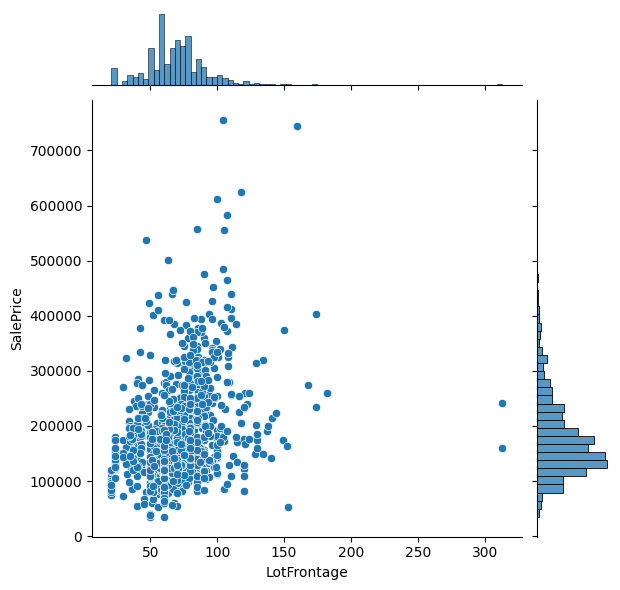

In [38]:
sns.jointplot(x='LotFrontage', y='SalePrice', data = hp)

Imputation - fill in missing values
- using median for imputing missing values. It helps preserve the data's central tendency and is less sensitive to outliers compared to the mean.

In [39]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [40]:
hp.LotArea

Id
1        8450.0
2        9600.0
3       11250.0
4        9550.0
5       14260.0
         ...   
1456     7917.0
1457    13175.0
1458     9042.0
1459     9717.0
1460     9937.0
Name: LotArea, Length: 1460, dtype: float64

In [47]:
hp.LotFrontage = hp.LotFrontage.fillna(hp.LotFrontage.mean())

In [48]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Seasonality in Data
- low sales data
- recurring patterns
- hike
- low times
- e.g; weather, ice creame sales, tourism industry

Use Correlation Factor to find 
m = minyear / minmonth
To remove seasonality in your data - The mean of every month and then divide it by the total mean that is coming, you would get a factor multiply that factor and get the values for your every year 


Bi-variant analysis (two variables)
- graphical way (scatter plot) -> visible r/s between. -> keep/discad/transform
- tabular (correlation matrix) -> near 0 can discard, 
variable transformation -> 
- One type of variable transformation is the independent variables are not related linearly but in some other functional form, we can modify the independent variable so that the modified version has more linear relationship with the dependent variable. Keep in mind that transforming a variable is not a mandatory thing. We are only transforming variables with the hope that it will eventually fit the model better once we know how to run the model
-  One type of transformation is where we have two or more dependent variables depicting similar type of data and having similar type of relation with the independent variable. In such a case, we can decide to take average of those values of these variables and put it into a new variable and use that new variable instead of the other variable.
- Next method of transformation is creating some rational variables which are relevant to business. What this means is, we may have found suppose the price of house depends on the quality of education maintained in the locality or city. ratio variables often makes more sense so transform such variables to ratio variables before the analysis

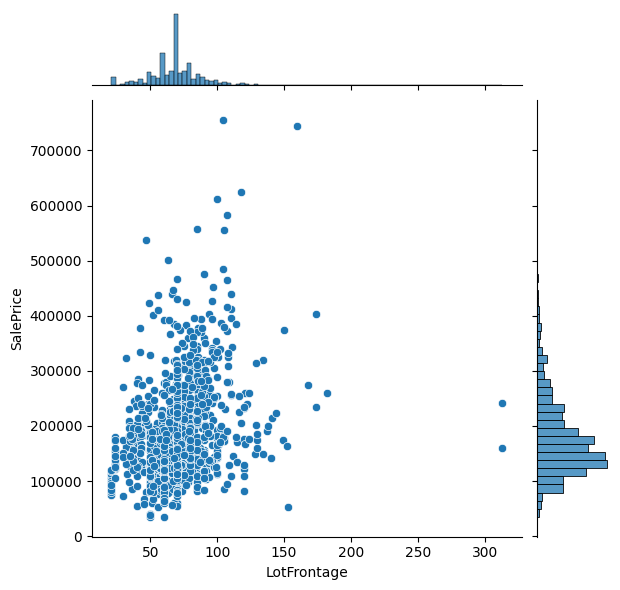

In [49]:
sns.jointplot(x='LotFrontage', y= 'SalePrice', data=hp)

In [50]:
hp.LotFrontage = np.log(1+hp.LotFrontage)

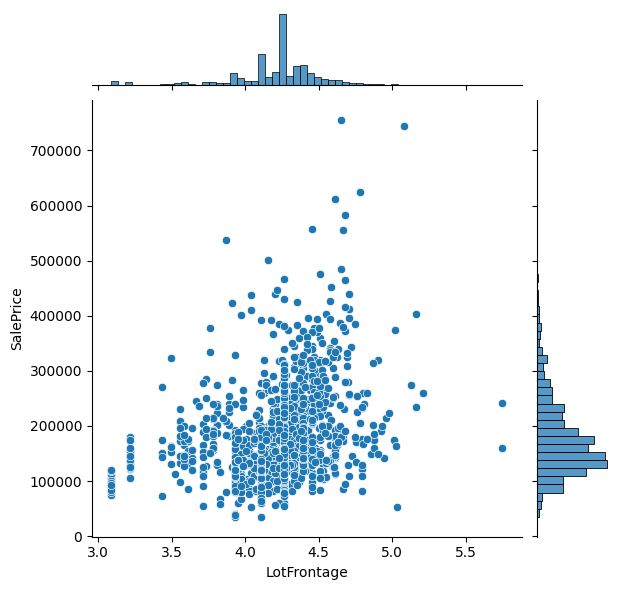

In [51]:
sns.jointplot(x='LotFrontage', y= 'SalePrice', data=hp)

Variable transformation aims to change the characteristics of a variable, such as its scale or distribution, to make it more suitable for analysis or modeling.

Handling Quantitative Data (string data type)
- assign numerical values to them -> create a dummy variable
- How many dummy variables do we need? The number of dummy variable is basically required to replace a variable number of categories you have in that variable minus 1. That is, if let's say the dummy variable over here in the airport has two categories like yes and no. Basically you will need 2-1 dummy variables. That is only one dummy variable. 

In [52]:
hp = pd.get_dummies(hp)

In [53]:
hp.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4.189655,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
2,20,4.394449,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
3,60,4.234107,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
4,70,4.110874,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
5,60,4.442651,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


remove redundant variables as it will give you false negative. such as dumy for yes and no. remove no  column 

Correlation Analysis 

Correlation vs Causation
- Correlation is just representing whether the value in two variables of a sample dataset are moving together or not. But it does not tell us anything about cause-effect relationship between the two. 
-  correlation matrix. If you look at the matrix, the diagonal line, which is there, the values everywhere is same.
- Primary goal of making the matrix is the same thing. Another useful feature of this matrix is that you can quickly find out which two independent variables are highly correlated
- When you will take both the variables in your model and the model has to assign relative importance to each of them, it's really a tedious job for the model. Every time you show your model a new sample of data, it will assign different regression coefficients to this variable. This problem of the model is called as multicollinearity. 
- Therefore, it is important that we identify the highly correlated independent variables and remove one of the two so that the multicollinearity can be avoided.
-try to keep the one which makes more business sense. If both make business sense, look at the correlation coefficient of both with the dependent variable. Whichever is higher, you may want to keep that one and remove the other. If both of them are having the same correlation coefficient, then you may want to go and pick the variable for which the data is easier to get. That is the use of correlation coefficient and correlation matrix.


In [55]:
##cannot confirm, just want to do analysis
hp.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.475500,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.475500,1.000000,0.289113,0.204399,-0.031393,0.088381,0.058630,0.142364,0.167915,0.039467,...,-0.055678,0.109670,-0.021851,-0.075491,-0.032352,-0.037766,-0.006839,0.007142,-0.053121,0.108490
LotArea,-0.139781,0.289113,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,0.032628,0.204399,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.059316,-0.031393,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.016241,-0.037766,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,-0.015130,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,0.030002,-0.006839,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.010116,0.021369,-0.026277,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.000983,0.007142,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009915,0.000765,-0.007929,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.024359,-0.053121,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084801,-0.019560,0.041207,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [ ]:
# delete variable that is not required(highest corr)